In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [ ]:
# Load the dataset
df = pd.read_csv('weather_data.csv')

# Display the first few rows
print(df.head())

# Summary of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   Outdoor Drybulb Temperature [C]  Outdoor Relative Humidity [%]  \
0                            17.81                          68.12   
1                            16.14                          74.75   
2                            16.10                          75.88   
3                            16.10                          78.25   
4                            16.16                          77.75   

   Diffuse Solar Radiation [W/m2]  Direct Solar Radiation [W/m2]  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   

   6h Prediction Outdoor Drybulb Temperature [C]  \
0                                          16.19   
1                                          17.20   
2                   

In [ ]:
# Drop irrelevant columns (if any) or fill missing values
df = df.fillna(method='ffill')

# Select input features and target variables
X = df[['Outdoor Relative Humidity [%]', 'Diffuse Solar Radiation [W/m2]', 'Direct Solar Radiation [W/m2]']]
y = df['Outdoor Drybulb Temperature [C]']  # Example target variable


<ipython-input-4-a43e3442a45d>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model (optional)
import joblib
joblib.dump(model, 'weather_model.pkl')


['weather_model.pkl']

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")


Mean Absolute Error: 5.596182371706066
Mean Squared Error: 46.9051999876097


In [ ]:
# Example: Predicting for new data
new_data = pd.DataFrame({
    'Outdoor Relative Humidity [%]': [65, 70, 75],
    'Diffuse Solar Radiation [W/m2]': [150, 200, 250],
    'Direct Solar Radiation [W/m2]': [300, 350, 400]
})

predictions = model.predict(new_data)
print("Predicted Temperatures:", predictions)


Predicted Temperatures: [21.89   22.4116 24.1985]


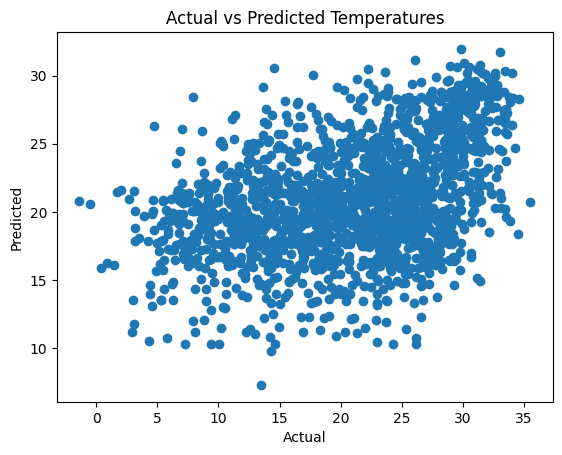

In [ ]:
import matplotlib.pyplot as plt

# Compare actual vs predicted
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted Temperatures")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
